In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H1.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
73,1.0,152.0,2015,July,27,2,4.0,10.0,2.0,0.0,...,No Deposit,243,NULL,0.0,Contract,67.58,0.0,0.0,Canceled,2015-04-03
272,0.0,45.0,2015,July,27,2,2.0,3.0,2.0,0.0,...,No Deposit,8,NULL,0.0,Contract,79.50,0.0,0.0,Check-Out,2015-07-07
303,0.0,1.0,2015,July,27,2,0.0,1.0,2.0,0.0,...,No Deposit,240,NULL,0.0,Transient,147.00,1.0,0.0,Check-Out,2015-07-03
339,0.0,130.0,2015,July,27,4,2.0,6.0,2.0,0.0,...,No Deposit,196,NULL,0.0,Transient,96.95,1.0,1.0,Check-Out,2015-07-12
430,0.0,37.0,2015,July,27,1,1.0,4.0,1.0,0.0,...,No Deposit,241,NULL,0.0,Transient,97.29,0.0,1.0,Check-Out,2015-07-06
529,0.0,98.0,2015,July,27,4,2.0,1.0,2.0,0.0,...,No Deposit,8,NULL,0.0,Transient,71.55,1.0,0.0,Check-Out,2015-07-07
756,0.0,150.0,2015,July,27,2,2.0,4.0,2.0,0.0,...,No Deposit,156,NULL,0.0,Contract,55.68,0.0,0.0,Check-Out,2015-07-08
874,0.0,157.0,2015,July,27,4,4.0,6.0,2.0,0.0,...,No Deposit,156,NULL,0.0,Contract,55.68,0.0,0.0,Check-Out,2015-07-14
1182,0.0,1.0,2015,July,27,1,0.0,1.0,1.0,0.0,...,No Deposit,NULL,270,0.0,Transient,134.00,0.0,0.0,Check-Out,2015-07-02
1279,1.0,26.0,2015,July,27,4,2.0,5.0,2.0,2.0,...,No Deposit,240,NULL,0.0,Transient,163.00,0.0,0.0,Canceled,2015-06-09


In [3]:
type(c)

pandas.core.frame.DataFrame

In [4]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
73,2015,27
272,2015,27
303,2015,27
339,2015,27
430,2015,27
529,2015,27
756,2015,27
874,2015,27
1182,2015,27
1279,2015,27


In [5]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

73       201527
272      201527
303      201527
339      201527
430      201527
529      201527
756      201527
874      201527
1182     201527
1279     201527
1701     201527
2605     201527
2741     201527
2841     201527
2899     201527
2963     201527
3114     201527
3284     201527
3298     201527
3753     201527
3771     201527
3978     201527
3997     201527
4004     201527
4223     201527
4272     201527
5000     201527
5651     201527
5689     201527
7061     201527
          ...  
16435    201735
16517    201735
16521    201735
16734    201735
16861    201735
17272    201735
17276    201735
17294    201735
17382    201735
17384    201735
17786    201735
17930    201735
18390    201735
18446    201735
18659    201735
18743    201735
18807    201735
18815    201735
18824    201735
18838    201735
18849    201735
18897    201735
19168    201735
19318    201735
19320    201735
19419    201735
19471    201735
19532    201735
19666    201735
19725    201735
Length: 20000, dtype: ob

In [6]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
73,1.0
272,0.0
303,0.0
339,0.0
430,0.0
529,0.0
756,0.0
874,0.0
1182,0.0
1279,1.0


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df3=pd.concat([df1, df2], axis = 1).T.drop_duplicates().T
df3
df3.columns = ['FullDate', 'IsCanceled']

In [9]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
272,201527,0
303,201527,0
339,201527,0
430,201527,0
529,201527,0
756,201527,0
874,201527,0
1182,201527,0
2605,201527,0
2741,201527,0


In [10]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,40.0
201528,45.0
201529,79.0
201530,69.0
201531,95.0
201532,62.0
201533,87.0
201534,61.0
201535,78.0


In [11]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     40.0
201528     45.0
201529     79.0
201530     69.0
201531     95.0
201532     62.0
201533     87.0
201534     61.0
201535     78.0
201536    139.0
201537     71.0
201538    175.0
201539    109.0
201540     83.0
201541    175.0
201542     16.0
201543     81.0
201544     40.0
201545     39.0
201546     45.0
201547     62.0
201548     14.0
201549    114.0
201550     20.0
201551     33.0
201552     70.0
201553     39.0
201601     33.0
201602     37.0
201603     12.0
          ...  
201706     82.0
201707     92.0
201708    115.0
201709     70.0
201710    117.0
201711     74.0
201712     45.0
201713     94.0
201714     91.0
201715    153.0
201716     88.0
201717     96.0
201718    152.0
201719     90.0
201720     73.0
201721    109.0
201722    181.0
201723    108.0
201724    132.0
201725    118.0
201726    147.0
201727    121.0
201728    122.0
201729    137.0
201730    144.0
201731    155.0
201732    127.0
201733    166.0
201734    128.0
201735     91.0
Name: IsCancele

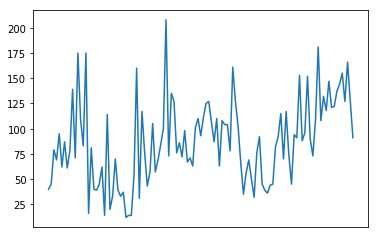

In [12]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [13]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,40.0
201528,45.0
201529,79.0
201530,69.0
201531,95.0
201532,62.0
201533,87.0
201534,61.0
201535,78.0


In [14]:
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, test = tseriesr[1:104], tseriesr[104:115]

In [15]:
train

FullDate
201528     45.0
201529     79.0
201530     69.0
201531     95.0
201532     62.0
201533     87.0
201534     61.0
201535     78.0
201536    139.0
201537     71.0
201538    175.0
201539    109.0
201540     83.0
201541    175.0
201542     16.0
201543     81.0
201544     40.0
201545     39.0
201546     45.0
201547     62.0
201548     14.0
201549    114.0
201550     20.0
201551     33.0
201552     70.0
201553     39.0
201601     33.0
201602     37.0
201603     12.0
201604     14.0
          ...  
201648     56.0
201649     69.0
201650     50.0
201651     32.0
201652     76.0
201653     92.0
201701     45.0
201702     39.0
201703     36.0
201704     44.0
201705     45.0
201706     82.0
201707     92.0
201708    115.0
201709     70.0
201710    117.0
201711     74.0
201712     45.0
201713     94.0
201714     91.0
201715    153.0
201716     88.0
201717     96.0
201718    152.0
201719     90.0
201720     73.0
201721    109.0
201722    181.0
201723    108.0
201724    132.0
Name: IsCancele

In [16]:
test

FullDate
201725    118.0
201726    147.0
201727    121.0
201728    122.0
201729    137.0
201730    144.0
201731    155.0
201732    127.0
201733    166.0
201734    128.0
201735     91.0
Name: IsCanceled, dtype: float64

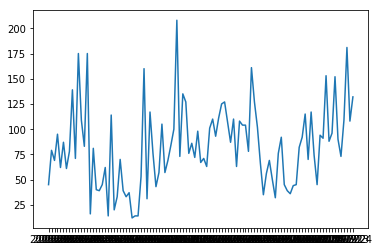

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts

plt.plot(train)
plt.show()

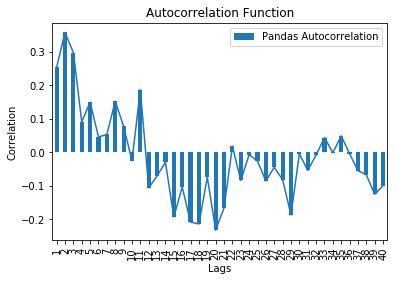

In [18]:
#Autocorrelation Plot
acf_1 =  acf(train)[1:50]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [19]:
acf_1

array([ 0.25350072,  0.35725732,  0.29709152,  0.09044649,  0.14904301,
        0.04520499,  0.05280516,  0.15183131,  0.07696847, -0.02581255,
        0.18579452, -0.10675294, -0.07111   , -0.03042697, -0.19370498,
       -0.10450113, -0.20922507, -0.21451964, -0.07517614, -0.23321162,
       -0.16675068,  0.01733653, -0.08473103, -0.00764156, -0.0272529 ,
       -0.08610873, -0.04531365, -0.08254859, -0.18772752, -0.00486538,
       -0.05468567, -0.00860511,  0.04306632, -0.00185255,  0.04841136,
       -0.00492406, -0.05540132, -0.0678685 , -0.12615043, -0.10034535])

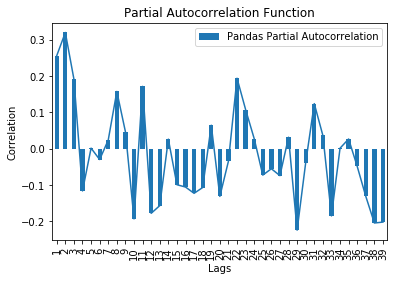

In [20]:
#Partial Autocorrelation Plot
pacf_1 =  pacf(train)[1:40]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [21]:
pacf_1

array([ 0.25598602,  0.31975613,  0.19156494, -0.11609668,  0.00159314,
       -0.02978753,  0.02404654,  0.15755837,  0.04676212, -0.19301148,
        0.17150826, -0.17767591, -0.15655084,  0.02631373, -0.09900853,
       -0.10545259, -0.12266062, -0.10669085,  0.06467711, -0.1311767 ,
       -0.03427407,  0.19394377,  0.10780181,  0.0277797 , -0.07259428,
       -0.05508374, -0.07407637,  0.03165855, -0.22406213, -0.03840341,
        0.12407706,  0.036462  , -0.18484459,  0.00139761,  0.0268101 ,
       -0.04855445, -0.13091737, -0.20436234, -0.20183339])

In [22]:
#Dickey-Fuller Test
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.998923
p-value: 0.034995
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.582


In [23]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=574.094, BIC=577.918, Fit time=0.232 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit A

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=559.620, BIC=565.356, Fit time=1.638 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=543.988, BIC=551.637, Fit time=4.383 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=547.819, BIC=559.291, Fit time=8.437 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=542.114, BIC=547.850, Fit time=2.471 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=543.993, BIC=551.641, Fit time=3.739 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=546.114, BIC=555.674, Fit time=2.240 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 23.187 seconds


/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


In [24]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  103
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 52)   Log Likelihood                -268.057
Date:                            Thu, 20 Jun 2019   AIC                            542.114
Time:                                    12:29:21   BIC                            547.850
Sample:                                         0   HQIC                           544.298
                                            - 103                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0931      0.617     -0.151      0.880      -1.303       1.117
ma.L1         -0.9988      5.242     -0.191      0.849     -11.272       9.275
sigma2      2457.5277   1.29e+04      0.190      0.849   -2.29e+04    2.78e+04
===================================================================================
Ljung-Box (Q):                       51.87   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.10   Prob(JB):                         0.71
Heteroskedasticity (H):               1.06   Skew:                            -0.27
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=11), index=test.index)
prediction.columns = ['Predicted_Cancellations']
predictions=prediction['Predicted_Cancellations']

In [26]:
prediction

,Predicted_Cancellations
FullDate,
201725,79.502448
201726,83.409299
201727,75.316151
201728,113.223003
201729,122.129854
201730,105.036706
201731,122.943558
201732,136.850409
201733,138.757261


In [27]:
test

FullDate
201725    118.0
201726    147.0
201727    121.0
201728    122.0
201729    137.0
201730    144.0
201731    155.0
201732    127.0
201733    166.0
201734    128.0
201735     91.0
Name: IsCanceled, dtype: float64

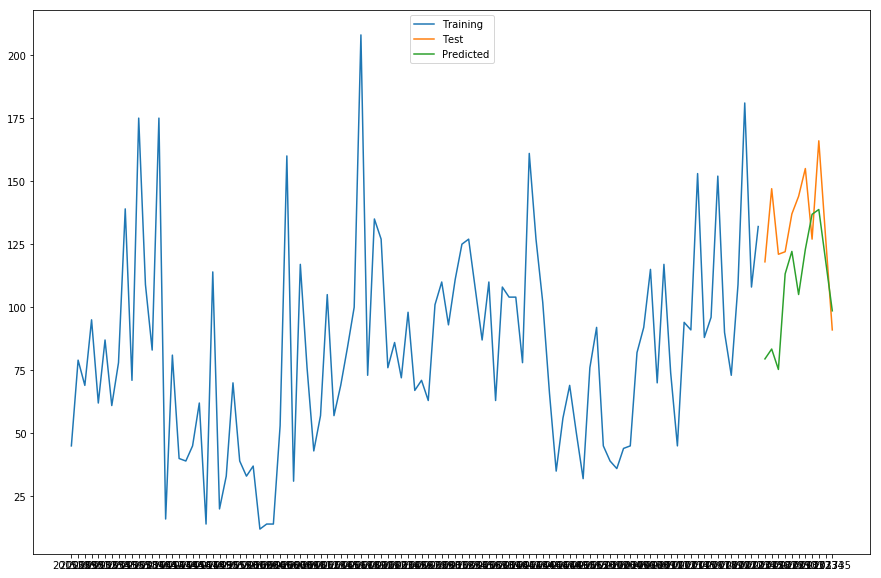

In [28]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [34]:
df.to_csv(r'/media/veracrypt9/a_documents/group b/projects/2 hotel project/weeklycancellations.csv')

In [44]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [45]:
mda(test, predictions)

0.8181818181818182